# 24h Events

In [1]:
from __future__ import unicode_literals
from IPython.display import display, HTML
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import datetime
import common.chat
import common.live
import common.videos

In [2]:
class ComparisonType:
    week, week_no_weekend, weekday = range(3)

In [3]:
#config
#reload(sys)
#sys.setdefaultencoding('utf-8')
pd.set_option('display.max_columns', None)
matplotlib.style.use('ggplot')
%matplotlib inline

#constants
LIVE_DATA_DIRECTORY = '/home/marcel/rbtv/rbtvdata/live'

#shows
shows = [{
    'name': 'Fallout 24h',
    'start': datetime.datetime(2015, 10, 31, 12, 0, 0),
    'end': datetime.datetime(2015, 11, 1, 12, 0, 0)
}, {
    'name': 'Skyrim 24h',
    'start': datetime.datetime(2016, 10, 28, 10, 30, 0),
    'end': datetime.datetime(2016, 10, 29, 10, 30, 0)
}]

#live viewers margin left
liveMarginLeft = datetime.timedelta(hours=3)

#live viewers margin right
liveMarginRight = datetime.timedelta(hours=3)

#relative live viewers change left span
changeSpanLeft = datetime.timedelta(weeks=4)

#relative live viewers change right span
changeSpanRight = datetime.timedelta()

#relative live viewers change comparison type
comparison = ComparisonType.week_no_weekend

In [4]:
#load live data
live = common.live.load(LIVE_DATA_DIRECTORY)

#create additional column
live['day'] = live.index.strftime('%Y-%m-%d')
live['weekday'] = live.index.dayofweek
live['hour'] = live.index.strftime('%H')

## Live Zuschauer

,live_views_mean,live_views_comp_mean,live_views_comp_median,live_views_change_mean,live_views_change_median
hour,,,,,
00,13704.816667,4219.393333,3823.0,224.805383,258.483303
01,10712.800000,2519.323333,2486.0,325.225292,330.925181
02,8576.100000,1918.013333,1919.0,347.134535,346.904638
03,6993.300000,1507.130833,1504.0,364.014128,364.980053
04,6513.633333,1244.046667,1262.5,423.584324,415.931353
05,5823.000000,1128.651667,1154.5,415.925345,404.374188
06,5060.383333,1083.069167,1088.0,367.226239,365.108762
07,5293.883333,1077.110000,1046.5,391.489572,405.865584
08,6660.516667,1196.640000,1188.0,456.601540,460.649551


,live_views_mean,live_views_comp_mean,live_views_comp_median,live_views_change_mean,live_views_change_median
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,11752.279895,4779.176979,4332.187500,245.798720,258.798698
std,3918.568441,3650.229589,3030.536898,141.759987,133.633727
min,5060.383333,1077.110000,1046.500000,16.850443,41.729414
25%,8070.687500,1555.222708,1558.000000,123.290652,128.313962
50%,13979.450000,3856.086667,3651.000000,244.504640,275.213477
75%,15145.150000,6865.586875,6729.000000,364.817156,365.012230
max,15664.350000,12338.963333,10173.000000,456.601540,460.649551


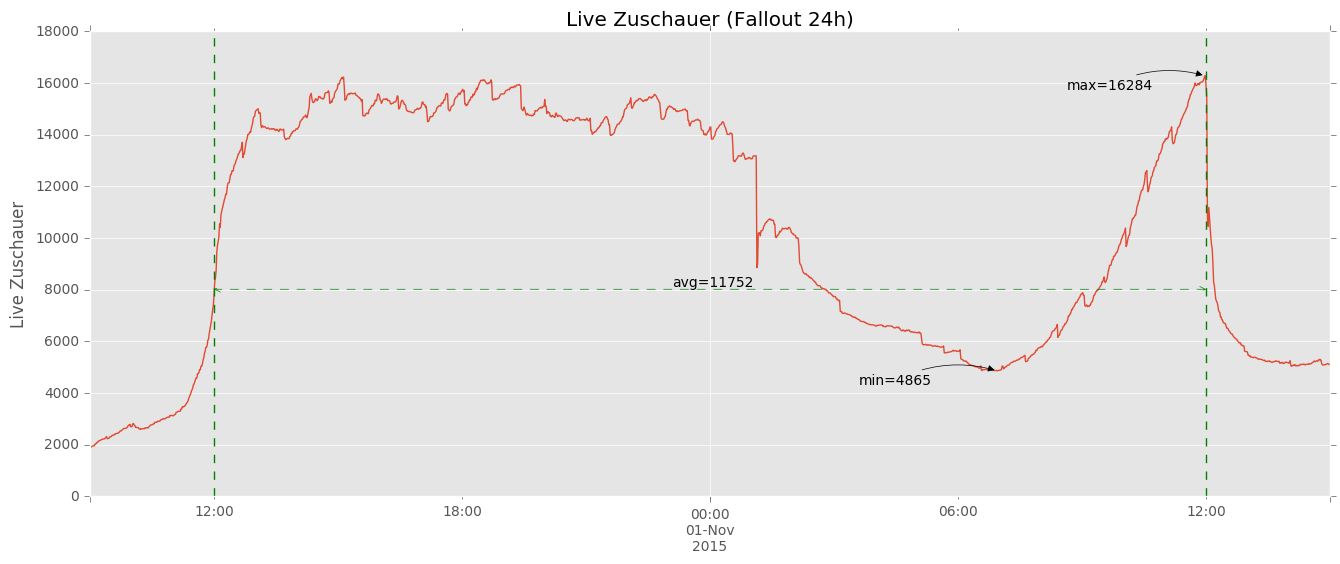

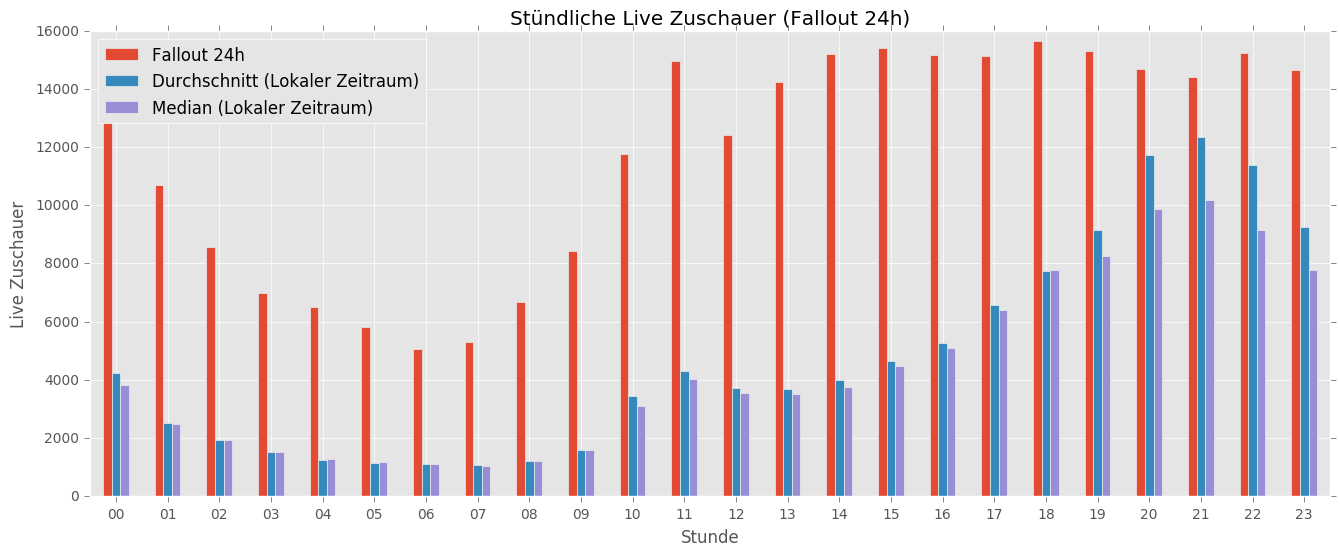

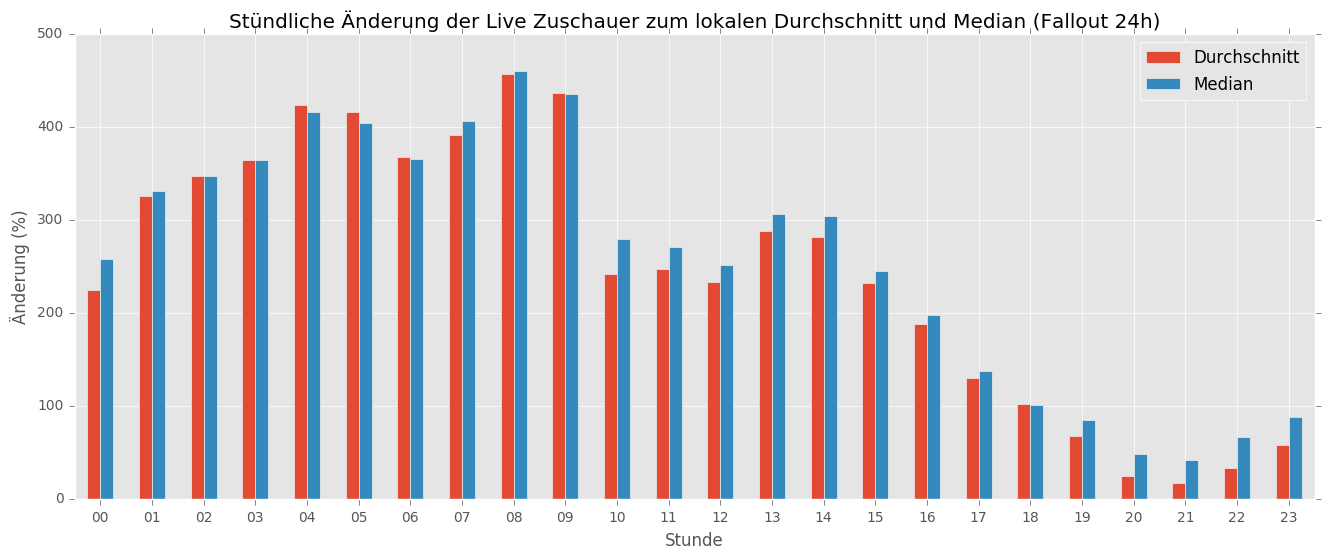

,live_views_mean,live_views_comp_mean,live_views_comp_median,live_views_change_mean,live_views_change_median
hour,,,,,
00,5590.100000,2245.629365,2048.5,148.932441,172.887479
01,4624.433333,1327.065873,1300.0,248.470519,255.725641
02,3913.900000,984.647751,998.0,297.492402,292.174349
03,3199.300000,768.078968,785.5,316.532692,307.294717
04,2710.950000,632.805556,664.0,328.401738,308.275602
05,2312.683333,563.002381,569.0,310.776830,306.446983
06,2094.533333,552.734921,562.5,278.939932,272.361481
07,2099.700000,544.980159,562.0,285.280082,273.612100
08,2491.350000,588.905556,611.0,323.047461,307.749591


,live_views_mean,live_views_comp_mean,live_views_comp_median,live_views_change_mean,live_views_change_median
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,4467.989959,2644.564379,2503.666667,157.747282,163.086587
std,1409.573057,2136.220052,2005.894822,125.837702,119.273472
min,2094.533333,544.980159,562.000000,-17.881723,-13.560964
25%,3287.037500,786.229861,783.875000,56.423610,63.305645
50%,4992.950000,2024.992083,1910.500000,149.087184,162.654148
75%,5649.750000,3889.406667,3697.250000,288.333162,278.252662
max,6167.466667,7244.631667,6882.500000,328.401738,325.710312


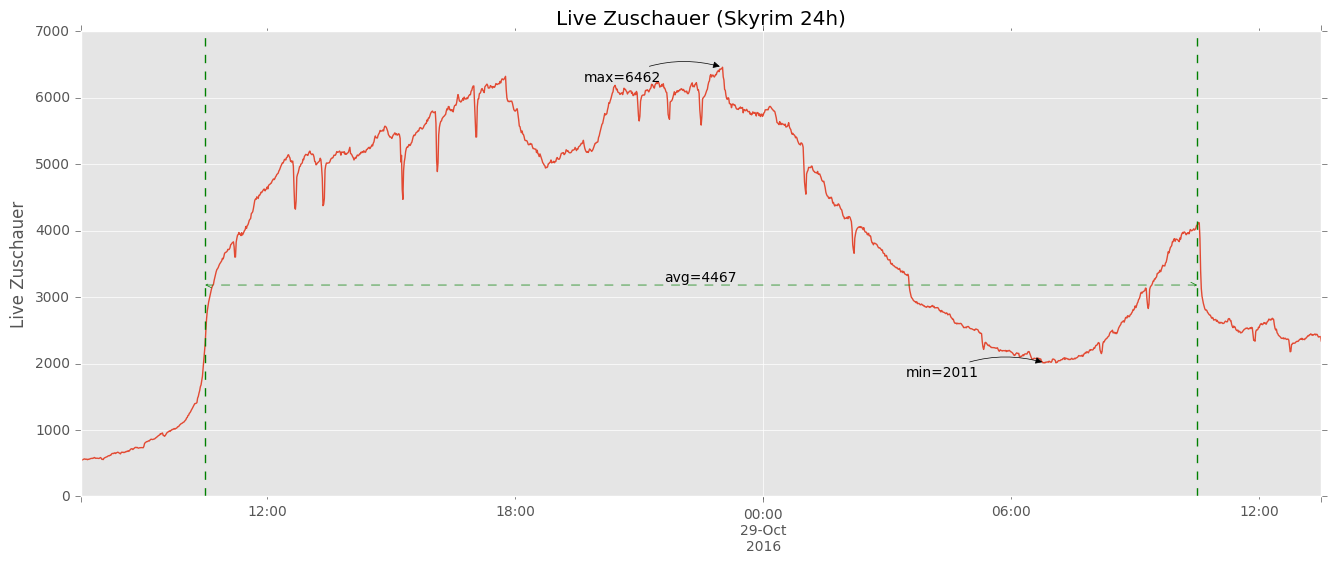

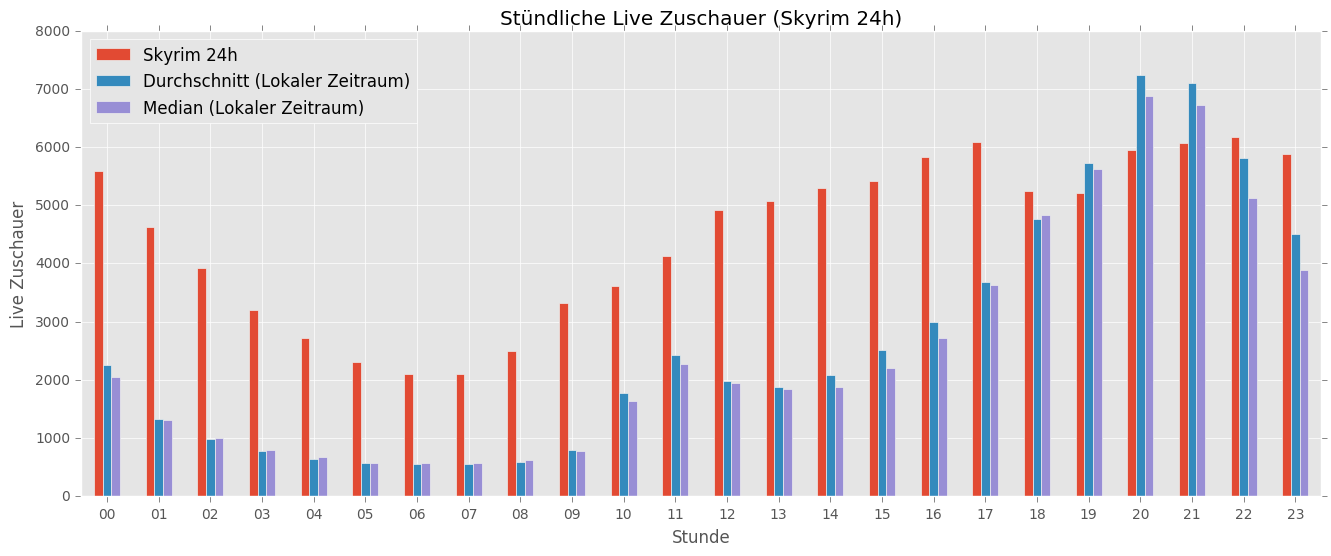

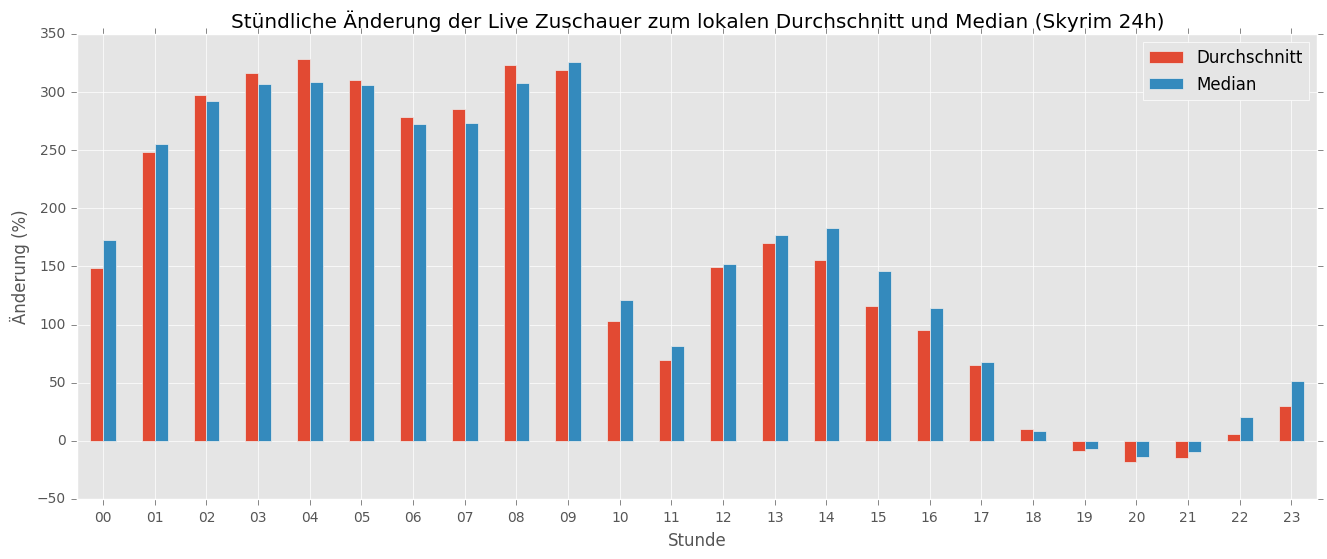

In [5]:
for show in shows:
    #live data
    liveFiltered = live.loc[show['start'] : show['end']]
    liveGrouped = liveFiltered.groupby('hour')
    liveViewsMean = liveGrouped['viewers'].mean().to_frame('viewers')

    #start/end date (comparision period)
    startDate = show['start'] - changeSpanLeft
    startDate = startDate.replace(hour=0, minute=0, second=0)
    endDate = show['start'] + changeSpanRight
    endDate = endDate.replace(hour=11, minute=59, second=59)

    #filter live data by date (comparision period)
    liveCompFiltered = live.loc[startDate : endDate]

    if comparison == ComparisonType.week:
        #no additional filter necessary
        pass
    elif comparison == ComparisonType.week_no_weekend:
        workingDays = range(0,5)
        liveCompFiltered = liveCompFiltered[liveCompFiltered['weekday'].isin(workingDays)]
    elif comparison == ComparisonType.weekday:
        liveCompFiltered = liveCompFiltered[liveCompFiltered['weekday'] == show['date'].weekday()]

    liveCompGrouped = liveCompFiltered.groupby('hour')
    liveViewsCompMean = liveCompGrouped['viewers'].mean().to_frame('viewers')
    liveViewsCompMedian = liveCompGrouped['viewers'].median().to_frame('viewers')

    #calculate change (mean)
    liveViewsChangeMean = 100 * (liveViewsMean - liveViewsCompMean) / liveViewsCompMean
    liveViewsChangeMean.columns = ['change']    

    #calculate change (median)
    liveViewsChangeMedian = 100 * (liveViewsMean - liveViewsCompMedian) / liveViewsCompMedian
    liveViewsChangeMedian.columns = ['change']

    #data
    joinedData = pd.DataFrame()
    joinedData['live_views_mean'] = liveViewsMean['viewers']
    joinedData['live_views_comp_mean'] = liveViewsCompMean['viewers']
    joinedData['live_views_comp_median'] = liveViewsCompMedian['viewers']
    joinedData['live_views_change_mean'] = liveViewsChangeMean['change']
    joinedData['live_views_change_median'] = liveViewsChangeMedian['change']

    #print data
    display(joinedData)
    display(joinedData.describe())

    #======== plot live views ========
    dateStart = show['start'] - liveMarginLeft
    dateEnd = show['end'] + liveMarginRight
    liveFilteredMargin = live.loc[dateStart : dateEnd]['viewers'].to_frame('viewers')

    plot = liveFilteredMargin.plot(figsize=(16, 6), legend=False, title='Live Zuschauer (%s)' % show['name'])
    plot.set_xlabel('')
    plot.set_ylabel('Live Zuschauer')

    plt.ylim(ymin=0)

    #annotate min
    datapointMin = {
        'x': liveFiltered['viewers'].idxmin(),
        'y': liveFiltered['viewers'].min()
    }
    plot.annotate('min=%d' % datapointMin['y'], 
                  xy=(datapointMin['x'], datapointMin['y']), xycoords='data', 
                  xytext=(-100, -10), textcoords='offset points',
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle='arc3,rad=-0.2',
                                  linewidth = 0.5,
                                  color = 'black')
                 )

    #annotate max
    datapointMax = {
        'x': liveFiltered['viewers'].idxmax(),
        'y': liveFiltered['viewers'].max()
    }
    plot.annotate('max=%d' % datapointMax['y'], 
                  xy=(datapointMax['x'], datapointMax['y']), xycoords='data', 
                  xytext=(-100, -10), textcoords='offset points',
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle='arc3,rad=-0.2',
                                  linewidth = 0.5,
                                  color = 'black')
                 )

    #annotate avg
    dateMiddle = (show['start'] + (show['end'] - show['start']) / 2)
    plot.annotate('', 
                  xy=(show['start'], datapointMax['y'] / 2.03), xycoords='data', 
                  xytext=(show['end'], datapointMax['y'] / 2.03), textcoords='data',
                  arrowprops=dict(edgecolor='g', arrowstyle = '<->', linestyle='--', shrinkA=0, shrinkB=0)
                  )
    plot.annotate('avg=%d' % liveFiltered['viewers'].mean(), 
                  xy=(dateMiddle, datapointMax['y'] / 2), xycoords='data', 
                  xytext=(-27, 0), textcoords='offset points')

    #start/end times
    plot.axvline(show['start'], color='g', linestyle='--')
    plot.axvline(show['end'], color='g', linestyle='--')

    #======== plot live views hourly ========
    plot = joinedData[['live_views_mean', 'live_views_comp_mean', 'live_views_comp_median']].plot(kind='bar', figsize=(16, 6), title='Stündliche Live Zuschauer (%s)' % show['name'])
    plot.set_xlabel('Stunde')
    plot.set_ylabel('Live Zuschauer')

    legend = plot.legend(loc=0)
    legend.get_texts()[0].set_text(show['name'])
    legend.get_texts()[1].set_text('Durchschnitt (Lokaler Zeitraum)')
    legend.get_texts()[2].set_text('Median (Lokaler Zeitraum)')

    plt.xticks(rotation=0)
    plt.ylim(ymin=0)

    #======== plot live views change hourly ========
    plot = joinedData[['live_views_change_mean', 'live_views_change_median']].plot(kind='bar', figsize=(16, 6), title='Stündliche Änderung der Live Zuschauer zum lokalen Durchschnitt und Median (%s)' % show['name'])
    plot.set_xlabel('Stunde')
    plot.set_ylabel('Änderung (%)')

    legend = plot.legend(loc=0)
    legend.get_texts()[0].set_text('Durchschnitt')
    legend.get_texts()[1].set_text('Median')

    plt.xticks(rotation=0)

    plt.show()